In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [31]:
N = 1000
K = 1000
step = 10

# Нормальное распределение

Создадим выборку размера $N$ для нормального стандартного распределения ($a = 0$, $\sigma^2 = 1$):

In [32]:
norm_rv = sts.norm()
norm_sample = norm_rv.rvs(N)

Для всех $n \leqslant N$ посчитаем значения полученных оценок методом моментов. Для $a$ оценка $\hat{a} = \overline{X}$, а для $\sigma^2$ получили $\hat{\sigma}^2 = \overline{X^2} - \left(\overline{X}\right)^2$

Для этого создадим общую для всех функцию, которая будет принимать на вход выборку и функцию, считающую оценку, а возвращать - значение самой оценки для каждого $n$.

In [33]:
def CountEstimators(sample, CountEstimator):
    estimators = np.zeros(N)
    for n in range(1, N):
        estimators[n] = CountEstimator(sample[:n + 1])
    return estimators

Посчитаем оценки параметров $a$ и $\sigma$

In [34]:
def CountNormEstimatorLoc(sample):
    return np.mean(sample)

In [35]:
def CountNormEstimatorScale(sample):
    return np.mean(sample ** 2) - np.mean(sample) ** 2

In [36]:
a_estimators = CountEstimators(norm_sample, CountNormEstimatorLoc)
sigma_estimators = CountEstimators(norm_sample, CountNormEstimatorScale)

Сгенерируем $K = 1000$ бутстрепных выборок для каждой оценки параметра $a$ с помощью параметрического бутстрепа. Размер бутстрепной выборки будет равняться размеру исходной выборки, также будем считать для каждого $n$ с шагом в 10. Кроме этого, переменной $start$ будем задавать начало интервала, по которому будем перебирать значения $n$.

In [37]:
def GetVarianceParamOfLoc(sample, param_estimators, sigma=1, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        norm_rv = sts.norm(loc=param_estimators[n], scale=sigma ** 0.5)
        bootstrap_param_samples = norm_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountNormEstimatorLoc(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

In [39]:
param_s = GetVarianceParamOfLoc(norm_sample, a_estimators, start=10)

Аналогично делаем с помощью непараметрического бутстрепа. В данном случае, так как непараметрический бутсреп не зависит на прямую от распределения, а зависит только от конкретной выборки, то напишем общую для всех функцию, принимающую выборку и функцию, считающую оценку параметра

In [40]:
def GetVarianceNonparam(sample, CountEstimator, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        bootstrap_param_samples = np.random.choice(sample[:n], size=(K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

In [41]:
nonparam_s = GetVarianceNonparam(norm_sample, CountNormEstimatorLoc, start=10)

Создадим функцию, которая будет строить график зависимости бутстрепной оценки дисперсии от размера выборки при параметрическом и непараметрическом бутстрепе

In [1]:
def CreatePlot(param_s, nonparam_s, estimator, start):
    plt.figure(figsize=(12, 6))
    plt.xlabel(r"$n$")
    plt.ylabel(r"$s^2$")
    plt.title("График зависимости бутстрепеной оценки дисперсии оценки " + \
              estimator +" от размера выборки")
    plt.plot(range(start, N, step), param_s, label="Параметрический бутстреп")
    plt.plot(range(start, N, step), nonparam_s, label="Непараметрический бутстреп")
    plt.legend(loc='best');

Строим график зависимости бутстрепной оценки дисперсии оценки $\hat{a}$ от размера выборки

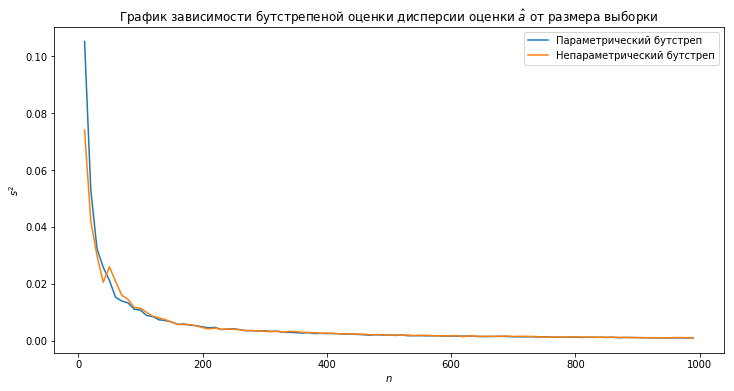

In [44]:
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

То же самое выполним для оценки параметра $\theta^2$

In [45]:
def GetVarianceParamOfScale(sample, param_estimators, a=0, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        norm_rv = sts.norm(loc=a, scale=param_estimators[n] ** 0.5)
        bootstrap_param_samples = norm_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountNormEstimatorScale(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

In [50]:
param_s = GetVarianceParamOfScale(norm_sample, sigma_estimators, start=10)

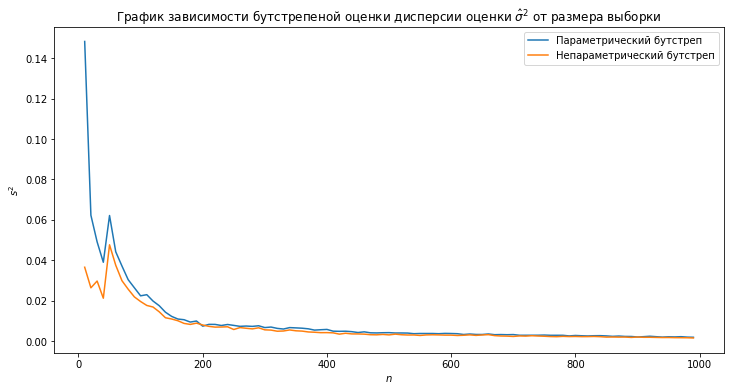

In [51]:
nonparam_s = GetVarianceNonparam(norm_sample, CountNormEstimatorScale, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\sigma}^2$", start=10)

Проделаем то же самое для других значений параметров $a$ и $\theta^2$:

$a = 5$, $\sigma^2 = 16$

In [52]:
a = 5
sigma = 16

In [53]:
norm_rv = sts.norm(loc=a, scale=sigma ** 0.5)
norm_sample = norm_rv.rvs(N)
a_estimators = CountEstimators(norm_sample, CountNormEstimatorLoc)
sigma_estimators = CountEstimators(norm_sample, CountNormEstimatorScale)

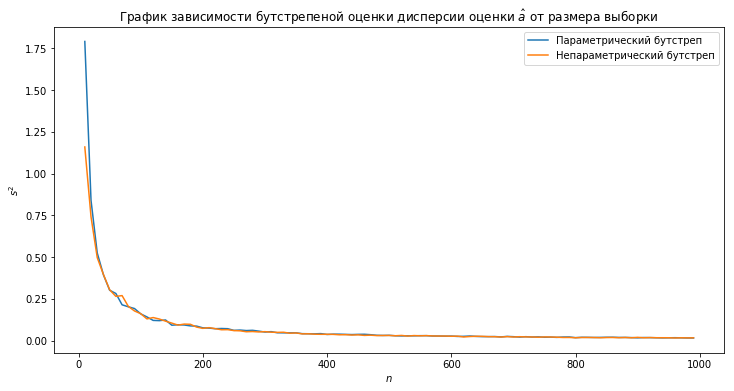

In [54]:
param_s = GetVarianceParamOfLoc(norm_sample, a_estimators, sigma, start=10)
nonparam_s = GetVarianceNonparam(norm_sample, CountNormEstimatorLoc, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

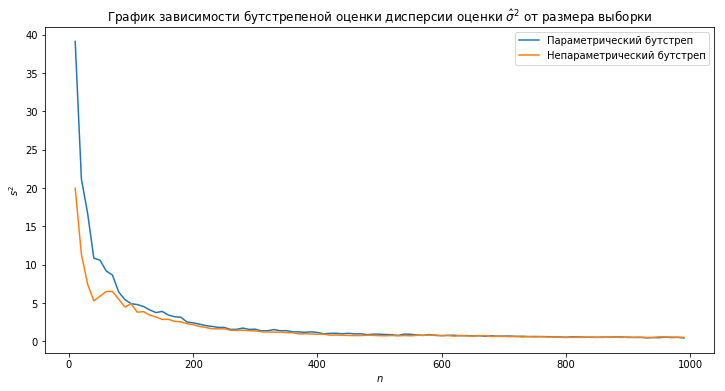

In [55]:
param_s = GetVarianceParamOfScale(norm_sample, sigma_estimators, a, start=10)
nonparam_s = GetVarianceNonparam(norm_sample, CountNormEstimatorScale, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\sigma}^2$", start=10)

$a = 15$, $\sigma^2 = 0.5$

In [56]:
a = 15
sigma = 0.5

In [57]:
norm_rv = sts.norm(loc=a, scale=sigma ** 0.5)
norm_sample = norm_rv.rvs(N)
a_estimators = CountEstimators(norm_sample, CountNormEstimatorLoc)
sigma_estimators = CountEstimators(norm_sample, CountNormEstimatorScale)

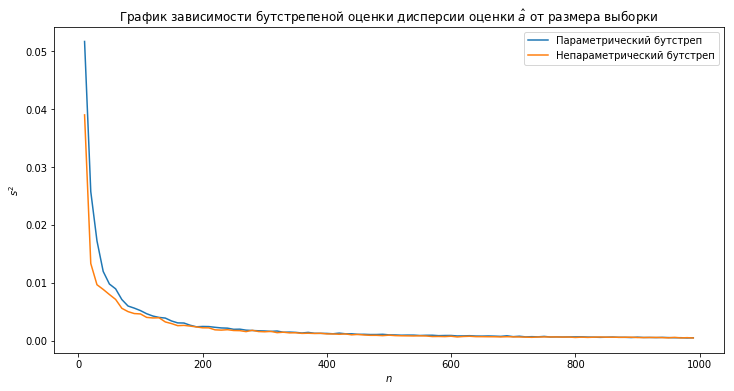

In [58]:
param_s = GetVarianceParamOfLoc(norm_sample, a_estimators, sigma, start=10)
nonparam_s = GetVarianceNonparam(norm_sample, CountNormEstimatorLoc, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

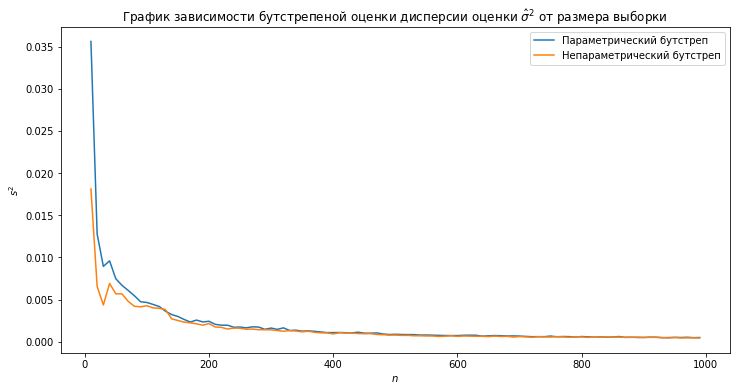

In [59]:
param_s = GetVarianceNonparam(norm_sample, CountNormEstimatorLoc, start=10)
nonparam_s = GetVarianceParamOfScale(norm_sample, sigma_estimators, a, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\sigma}^2$", start=10)

$\textbf{Вывод:}$ Как видно из графиков, бутсрепная оценка дисперсии тем меньше, чем меньше истинное значение дисперсии нормального распределенеия $\sigma^2$, причем бустрепная дисперсия оценки значительно меньше истинной. Кроме этого ее значение примерно одинаковое для параметрического и непараметрического бутстрепа, хотя параметрический все равно работает немного хуже. Откуда можно сделать вывод, что оба метода работают достаточно хорошо и можно использовать любой из них. Также, значение бутстрепной оценки дисперсии убывает при увеличении размера выборки, причем уже приблизительно при $n=300$ ее значение становится очень маленьким и при увеличении выборки почти не меняется.

# Гамма распределение

Проведем аналогичные исследования для Гамма распределения с параметрами $\alpha$ и $\lambda$. Для $\alpha$ оценка $\hat{\alpha} = \frac{
\left(\overline{X}\right)^2}{\overline{X^2} - \left(\overline{X}\right)^2}$, для $\lambda$ оценка $\hat{\lambda} = \frac{\overline{X}}{\overline{X^2} - \left(\overline{X}\right)^2}$,

In [60]:
alpha = 1
lambd = 0.5

In [61]:
gamma_rv = sts.gamma(a=alpha, scale=1/lambd)
gamma_sample = gamma_rv.rvs(N)

In [62]:
def CountGammaEstimatorAlpha(sample):
    return np.mean(sample) ** 2 / (np.mean(sample ** 2) - np.mean(sample) ** 2)

In [63]:
def CountGammaEstimatorLambda(sample):
    return np.mean(sample) / (np.mean(sample ** 2) - np.mean(sample) ** 2)

In [64]:
alpha_estimators = CountEstimators(gamma_sample, CountGammaEstimatorAlpha)
lambda_estimators = CountEstimators(gamma_sample, CountGammaEstimatorLambda)

Найдем бутстрепную оценку дисперсии для $\alpha$

In [65]:
def GetVarianceParamOfAlpha(sample, param_estimators, lambd, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        gamma_rv = sts.gamma(a=param_estimators[n], scale=1/lambd)
        bootstrap_param_samples = gamma_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountGammaEstimatorAlpha(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

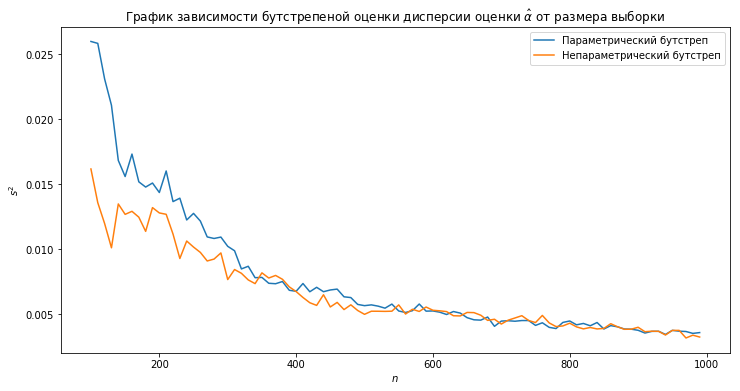

In [69]:
param_s = GetVarianceParamOfAlpha(gamma_sample, alpha_estimators, lambd, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorAlpha, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\alpha}$", start=100)

Аналогично для $\lambda$

In [70]:
def GetVarianceParamOfLambda(sample, param_estimators, alpha, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        gamma_rv = sts.gamma(a=alpha, scale=1/param_estimators[n])
        bootstrap_param_samples = gamma_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountGammaEstimatorLambda(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

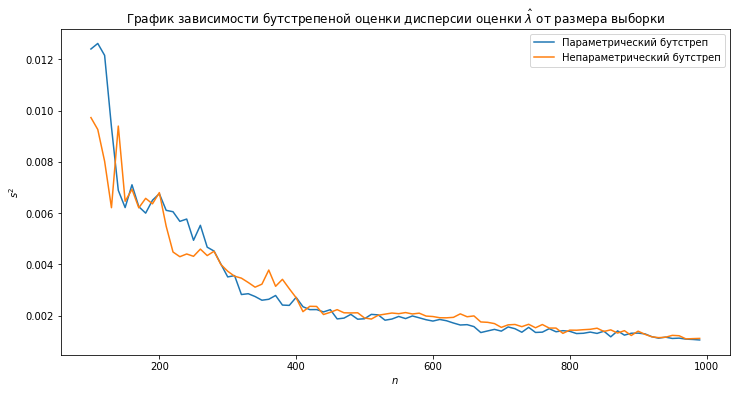

In [71]:
param_s = GetVarianceParamOfLambda(gamma_sample, lambda_estimators, alpha, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorLambda, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=100)

Рассмотрим оценки при других параметрах.

$\alpha = 2$, $\lambda = 1$

In [72]:
alpha = 2
lambd = 1

In [73]:
gamma_rv = sts.gamma(a=alpha, scale=1/lambd)
gamma_sample = gamma_rv.rvs(N)
alpha_estimators = CountEstimators(gamma_sample, CountGammaEstimatorAlpha)
lambda_estimators = CountEstimators(gamma_sample, CountGammaEstimatorLambda)

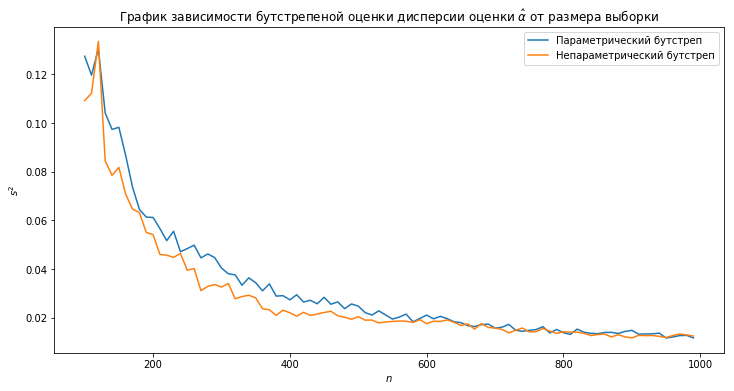

In [74]:
param_s = GetVarianceParamOfAlpha(gamma_sample, alpha_estimators, lambd, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorAlpha, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\alpha}$", start=100)

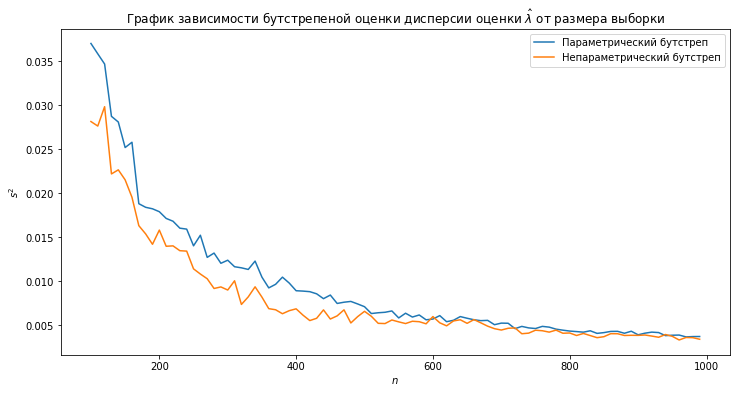

In [75]:
param_s = GetVarianceParamOfLambda(gamma_sample, lambda_estimators, alpha, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorLambda, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=100)

$\alpha = 9$, $\lambda = 0.5$

In [76]:
alpha = 9
lambd = 0.5

In [77]:
gamma_rv = sts.gamma(a=alpha, scale=1/lambd)
gamma_sample = gamma_rv.rvs(N)
alpha_estimators = CountEstimators(gamma_sample, CountGammaEstimatorAlpha)
lambda_estimators = CountEstimators(gamma_sample, CountGammaEstimatorLambda)

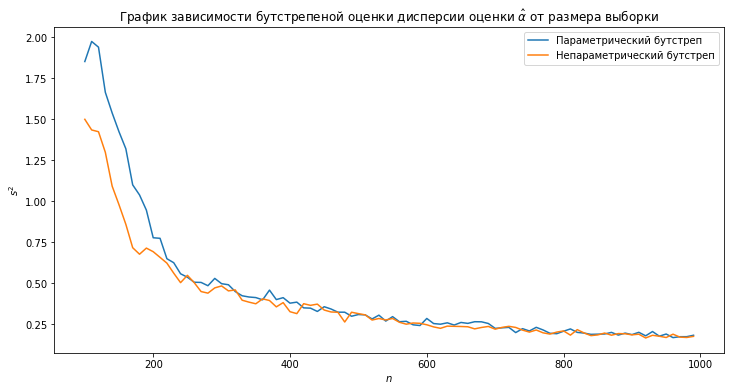

In [78]:
param_s = GetVarianceParamOfAlpha(gamma_sample, alpha_estimators, lambd, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorAlpha, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\alpha}$", start=100)

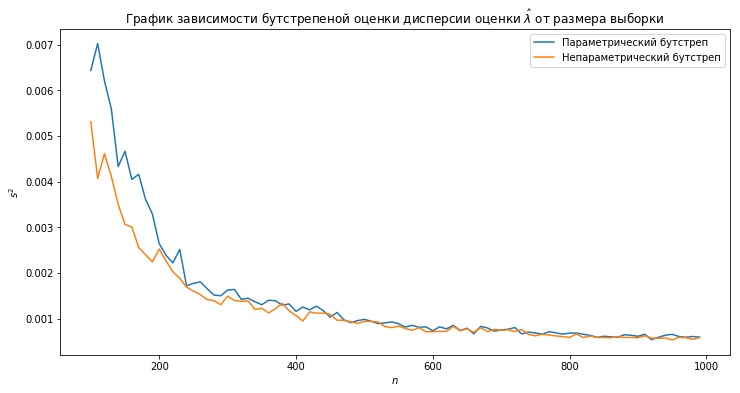

In [79]:
param_s = GetVarianceParamOfLambda(gamma_sample, lambda_estimators, alpha, start=100)
nonparam_s = GetVarianceNonparam(gamma_sample, CountGammaEstimatorLambda, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=100)

$\textbf{Вывод:}$ Аналогично нормальному распределению, значение $s^2$ тем больше, чем больше значение оцениваемого параметра, при увеличении размера выборки $s^2$ уменьшается и стремится к нулю, и для параметрического и непараметрического бутстрепа оценки приблизительно равны. Кроме того, графики были построены начиная с $n = 100$, это связано с тем, что при маленьких размерах выборки дисперсия получается неимоверно большой и мешает изучению графика при болших $n$.

# Равномерное распределение

Для равномерного распределения на отрезке $[a, b]$. Для $a$ оценка $\hat{a} = \overline{X} - \sqrt{3 \left(\overline{X^2} - \left(\overline{X}\right)^2\right)}$, для $b$ оценка $\hat{b} = \overline{X} + \sqrt{3 \left(\overline{X^2} - \left(\overline{X}\right)^2\right)}$

In [80]:
a = 0
b = 1

In [81]:
uniform_rv = sts.uniform(loc=a, scale=b-a)
uniform_sample = uniform_rv.rvs(N)

In [82]:
def CountUniformEstimatorA(sample):
    return np.mean(sample) - (3 * (np.mean(sample ** 2) - np.mean(sample) ** 2)) ** 0.5

In [83]:
def CountUniformEstimatorB(sample):
    return np.mean(sample) + (3 * (np.mean(sample ** 2) - np.mean(sample) ** 2)) ** 0.5

In [84]:
a_estimators = CountEstimators(uniform_sample, CountUniformEstimatorA)
b_estimators = CountEstimators(uniform_sample, CountUniformEstimatorB)

In [87]:
def GetVarianceParamOfA(sample, param_estimators, b, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        uniform_rv = sts.uniform(loc=param_estimators[n], scale=b-param_estimators[n])
        bootstrap_param_samples = uniform_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountUniformEstimatorA(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

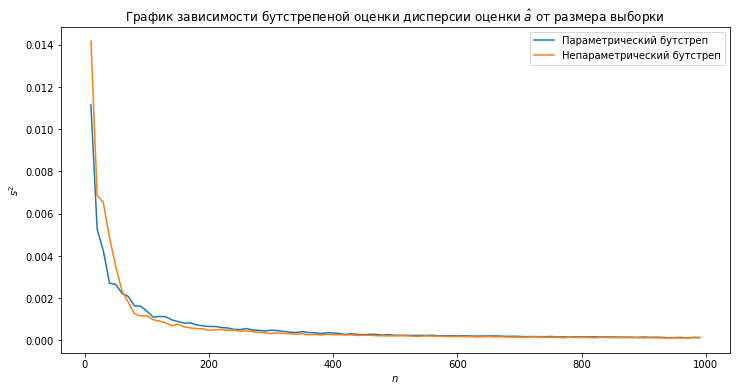

In [88]:
param_s = GetVarianceParamOfA(uniform_sample, a_estimators, b, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorA, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

In [89]:
def GetVarianceParamOfB(sample, param_estimators, a, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        uniform_rv = sts.uniform(loc=a, scale=param_estimators[n]-a)
        bootstrap_param_samples = uniform_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountUniformEstimatorB(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

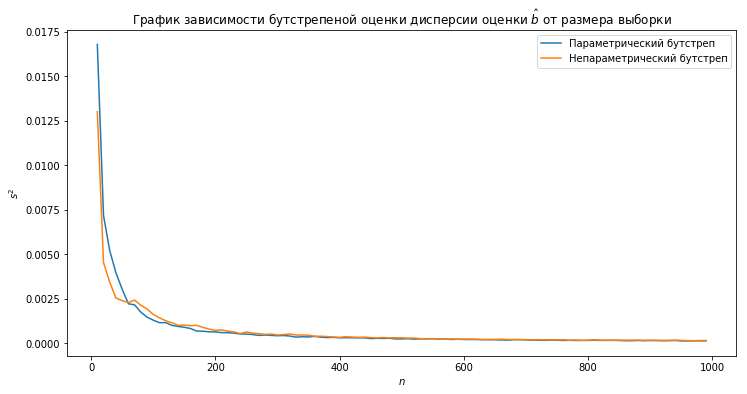

In [90]:
param_s = GetVarianceParamOfB(uniform_sample, b_estimators, a, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorB, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{b}$", start=10)

Рассмотрим оценки при других параметрах.

$a = 5$, $b = 100$

In [91]:
a = 5
b = 100

In [92]:
uniform_rv = sts.uniform(loc=a, scale=b-a)
uniform_sample = uniform_rv.rvs(N)
a_estimators = CountEstimators(uniform_sample, CountUniformEstimatorA)
b_estimators = CountEstimators(uniform_sample, CountUniformEstimatorB)

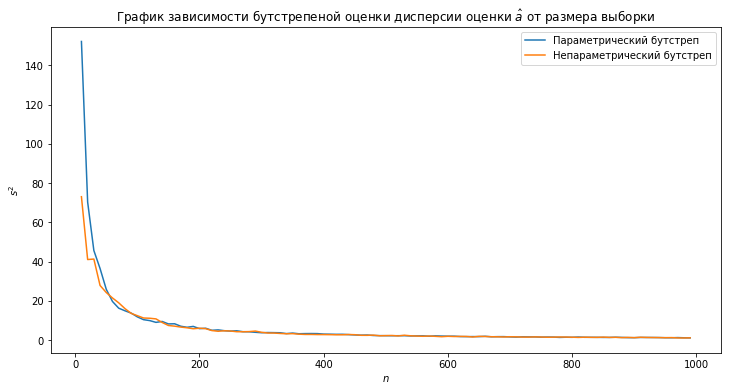

In [93]:
param_s = GetVarianceParamOfA(uniform_sample, a_estimators, b, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorA, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

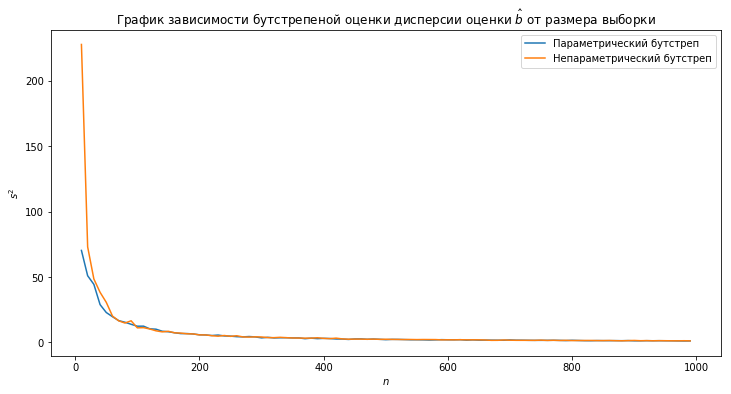

In [94]:
param_s = GetVarianceParamOfB(uniform_sample, b_estimators, a, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorB, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{b}$", start=10)

$a = -100$, $b = 100$

In [95]:
a = -100
b = 100

In [96]:
uniform_rv = sts.uniform(loc=a, scale=b-a)
uniform_sample = uniform_rv.rvs(N)
a_estimators = CountEstimators(uniform_sample, CountUniformEstimatorA)
b_estimators = CountEstimators(uniform_sample, CountUniformEstimatorB)

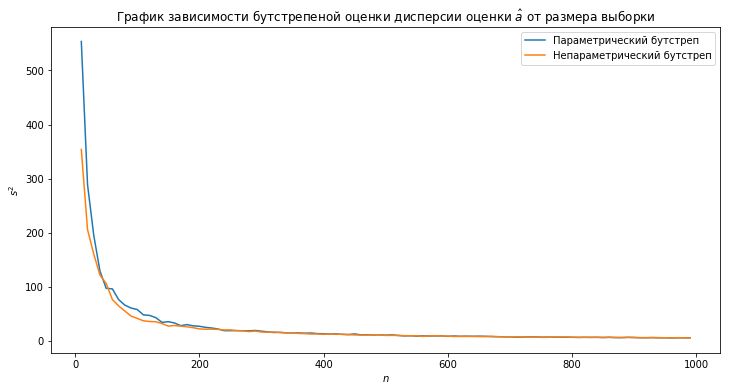

In [97]:
param_s = GetVarianceParamOfA(uniform_sample, a_estimators, b, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorA, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{a}$", start=10)

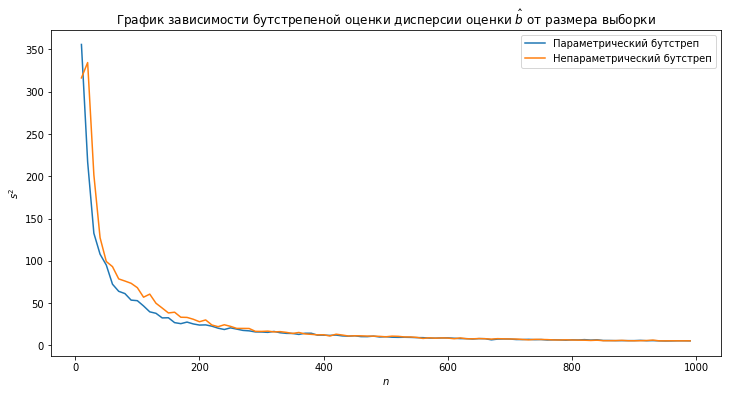

In [98]:
param_s = GetVarianceParamOfB(uniform_sample, b_estimators, a, start=10)
nonparam_s = GetVarianceNonparam(uniform_sample, CountUniformEstimatorB, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{b}$", start=10)

$\textbf{Вывод:}$ В данном примере интересен тот факт, что значения $s^2$ для параметров $a$ и $b$ примерно равны, это связано с тем, что дисперсия равномерного распределения симметрична относительно $a$ и $b$ и равна $\frac{(b - a)^2}{12}$, отсюда получаем, что и бутстрепные оценки дисперсии будут почти одинаковые. Остальные свойства, которые были выполнены для предыдущих оценок, также выполнены.

# Пуассоновское распределение

Для Пуассоновского распределения с параметром $\lambda$. Для $\lambda$ оценка $\hat{\lambda} = \overline{X}$.

In [99]:
lambd_ = 1

In [100]:
poisson_rv = sts.poisson(mu=lambd_)
poisson_sample = poisson_rv.rvs(N)

In [101]:
def CountPoissonEstimator(sample):
    return np.mean(sample)

In [102]:
lambda_estimators = CountEstimators(poisson_sample, CountPoissonEstimator)

In [103]:
def GetVarianceParamOfPoissonLambda(sample, param_estimators, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        poisson_rv = sts.poisson(mu=param_estimators[n])
        bootstrap_param_samples = poisson_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountPoissonEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

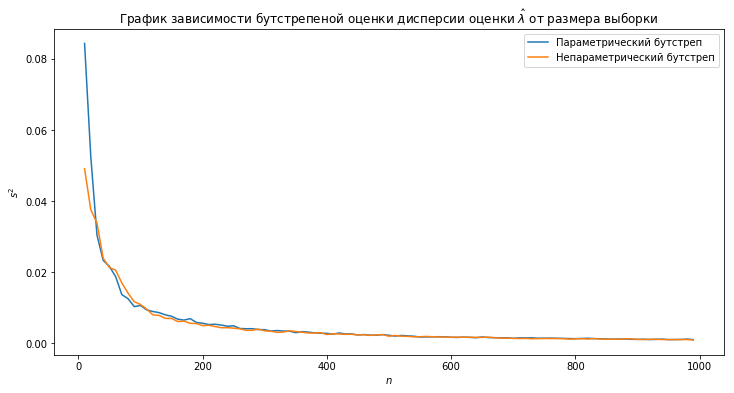

In [104]:
param_s = GetVarianceParamOfPoissonLambda(poisson_sample, lambda_estimators, start=10)
nonparam_s = GetVarianceNonparam(poisson_sample, CountPoissonEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=10)

Рассмотрим оценки при других параметрах.

$\lambda = 4$

In [105]:
lambd_ = 4

In [106]:
poisson_rv = sts.poisson(mu=lambd_)
poisson_sample = poisson_rv.rvs(N)
lambda_estimators = CountEstimators(poisson_sample, CountPoissonEstimator)

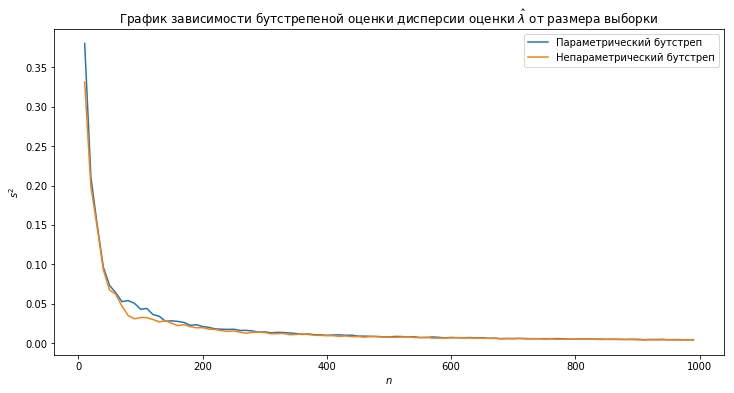

In [107]:
param_s = GetVarianceParamOfPoissonLambda(poisson_sample, lambda_estimators, start=10)
nonparam_s = GetVarianceNonparam(poisson_sample, CountPoissonEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=10)

$\lambda = 9$

In [108]:
lambd_ = 9

In [109]:
poisson_rv = sts.poisson(mu=lambd_)
poisson_sample = poisson_rv.rvs(N)
lambda_estimators = CountEstimators(poisson_sample, CountPoissonEstimator)

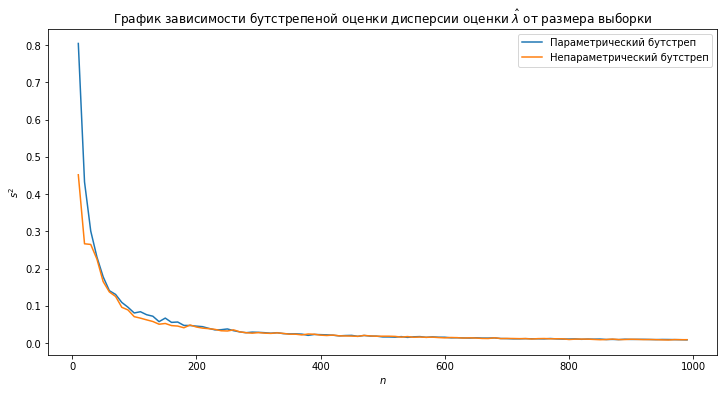

In [110]:
param_s = GetVarianceParamOfPoissonLambda(poisson_sample, lambda_estimators, start=10)
nonparam_s = GetVarianceNonparam(poisson_sample, CountPoissonEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda}$", start=10)

$\textbf{Вывод:}$ можно сделать вывод аналогичный предыдущим распределениям.

# Биномиальное распределение

Биномиальное распределение с параметрами $m$ и $p$. Для $m$ оценка $\hat{m} = \frac{\left(\overline{X}\right)^2}{\left(\overline{X}\right)^2 - \overline{X^2} + \overline{X}}$, для $p$ оценка $\hat{p} = \frac{\left(\overline{X}\right)^2 - \overline{X^2} + \overline{X}}{\overline{X}}$

In [111]:
m = 5
p = 0.4

In [112]:
binom_rv = sts.binom(m, p)
binom_sample = binom_rv.rvs(N)

In [113]:
def CountBinomEstimatorM(sample):
    return np.mean(sample) ** 2 / (np.mean(sample) ** 2 -  \
            np.mean(sample ** 2) + np.mean(sample))

In [114]:
def CountBinomEstimatorP(sample):
    return (np.mean(sample) ** 2 -  np.mean(sample ** 2) + \
            np.mean(sample)) / np.mean(sample)

In [115]:
m_estimators = CountEstimators(binom_sample, CountBinomEstimatorM)
p_estimators = CountEstimators(binom_sample, CountBinomEstimatorP)

In [117]:
def GetVarianceParamOfM(sample, param_estimators, p, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        binom_rv = sts.binom(int(param_estimators[n]), p)
        bootstrap_param_samples = binom_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountBinomEstimatorM(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


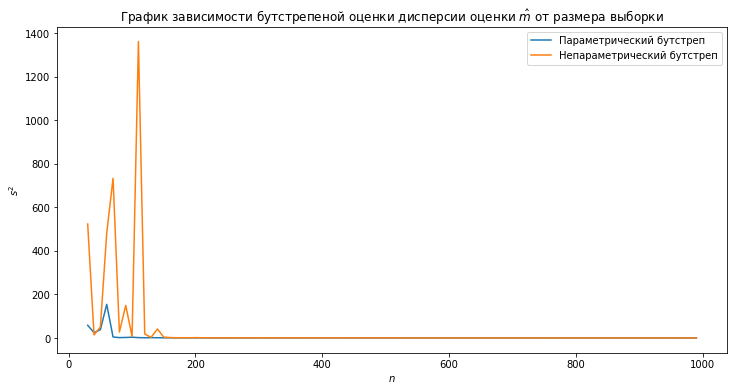

In [118]:
param_s = GetVarianceParamOfM(binom_sample, m_estimators, p, start=10)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorM, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{m}$", start=10)

Как можно заметить из графика, при малых размерах выборки происходит деление на ноль в непараметрическом бутстрепе, а также получаются пики. Рассмотрим более подробно график при размерах выборки больше 200.

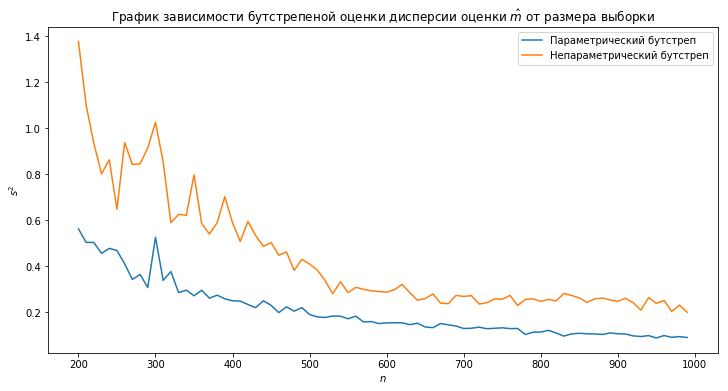

In [121]:
param_s = GetVarianceParamOfM(binom_sample, m_estimators, p, start=200)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorM, start=200)
CreatePlot(param_s, nonparam_s, r"$\hat{m}$", start=200)

In [122]:
def GetVarianceParamOfP(sample, param_estimators, m, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        binom_rv = sts.binom(m, param_estimators[n])
        bootstrap_param_samples = binom_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountBinomEstimatorP(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

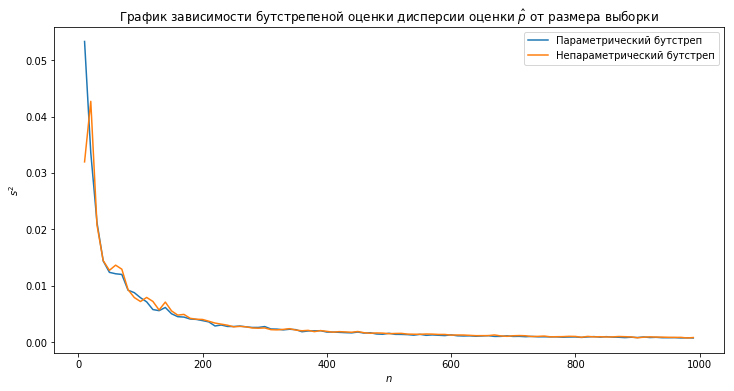

In [123]:
param_s = GetVarianceParamOfP(binom_sample, p_estimators, m, start=10)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorP, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

Рассмотрим оценки при других параметрах. При оценке параметра $m$ размер выборки будем брать больше 200.

$m = 15$, $p = 0.3$

In [124]:
m = 15
p = 0.3

In [125]:
binom_rv = sts.binom(m, p)
binom_sample = binom_rv.rvs(N)
m_estimators = CountEstimators(binom_sample, CountBinomEstimatorM)
p_estimators = CountEstimators(binom_sample, CountBinomEstimatorP)

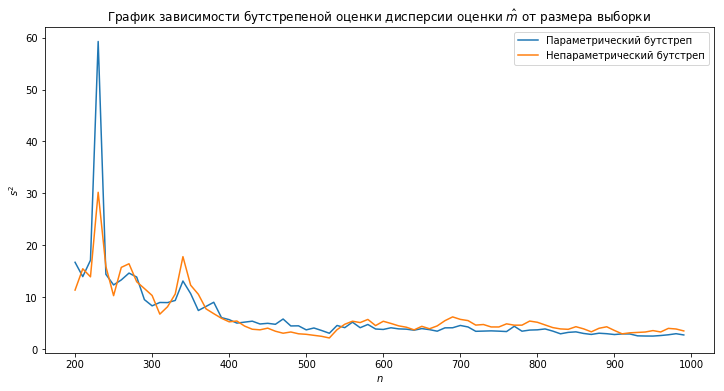

In [126]:
param_s = GetVarianceParamOfM(binom_sample, m_estimators, p, start=200)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorM, start=200)
CreatePlot(param_s, nonparam_s, r"$\hat{m}$", start=200)

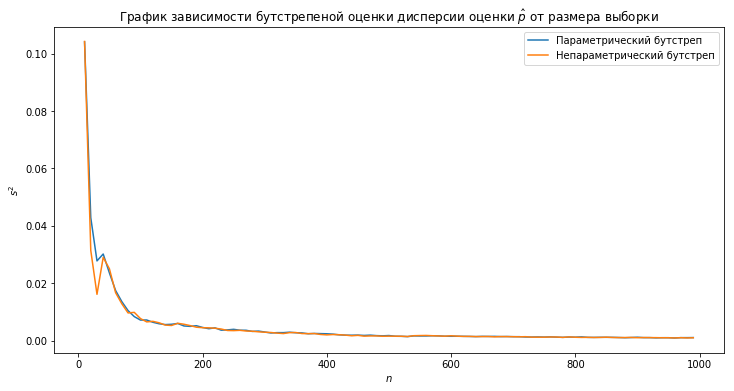

In [127]:
param_s = GetVarianceParamOfP(binom_sample, p_estimators, m, start=10)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorP, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

$m = 8$, $p = 0.8$

In [128]:
m = 8
p = 0.8

In [129]:
binom_rv = sts.binom(m, p)
binom_sample = binom_rv.rvs(N)
m_estimators = CountEstimators(binom_sample, CountBinomEstimatorM)
p_estimators = CountEstimators(binom_sample, CountBinomEstimatorP)

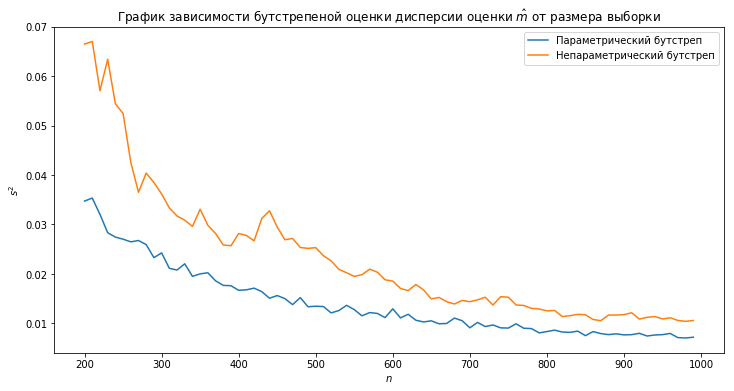

In [130]:
param_s = GetVarianceParamOfM(binom_sample, m_estimators, p, start=200)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorM, start=200)
CreatePlot(param_s, nonparam_s, r"$\hat{m}$", start=200)

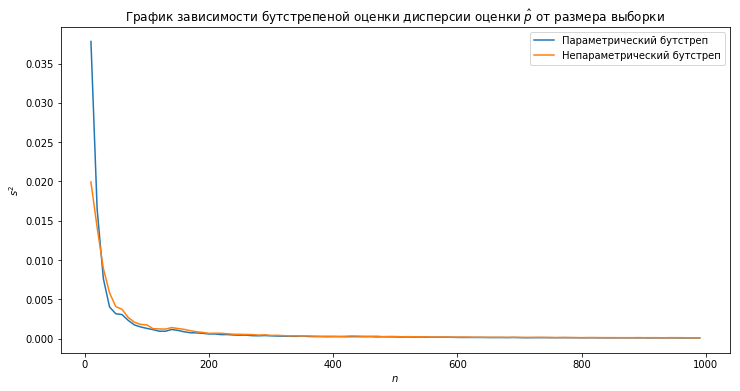

In [131]:
param_s = GetVarianceParamOfP(binom_sample, p_estimators, m, start=10)
nonparam_s = GetVarianceNonparam(binom_sample, CountBinomEstimatorP, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

$\textbf{Вывод:}$ Как видно из графиков, бутстреп плохо работает, когда параметр может принимать лишь дискретное число значений (как в случае параметра $m$), в этом случае при некоторых  небольших размерах выборки могут возникать большие значения оценки дисперсии, причем что и в параметрическом, что и в непараметрическом случаях, хотя в большей части параметрический случай лучше, но все равно дает плохие результаты. При больших размерах выборки бутстрепная оценка дисперсии все-таки начинает стремиться к нулю, но непараметрический бутстреп все равно оказывается хуже параметрического. Тем не менее для параметра $p$ оба способа бутстрепа дали очень хорошие значения бутстрепной оценки дисперсии, так как параметр $p$ может принимать любое значение на отрезке $[0, 1]$.

# Геометрическое распределение

Геометрическое распределение с параметром $p$. Для $p$ оценка $\hat{p} = \frac{1}{\overline{X}}$

In [132]:
p = 0.5

In [133]:
geom_rv = sts.geom(p)
geom_sample = geom_rv.rvs(N)

In [134]:
def CountGeomEstimator(sample):
    return 1 / np.mean(sample)

In [135]:
p_estimators = CountEstimators(geom_sample, CountGeomEstimator)

In [136]:
def GetVarianceParamOfPGeom(sample, param_estimators, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        geom_rv = sts.geom(param_estimators[n])
        bootstrap_param_samples = geom_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountGeomEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

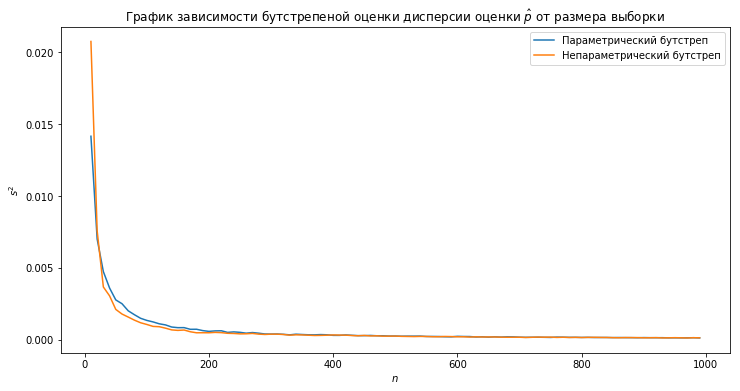

In [137]:
param_s = GetVarianceParamOfPGeom(geom_sample, p_estimators, start=10)
nonparam_s = GetVarianceNonparam(geom_sample, CountGeomEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

Рассмотрим оценки при других параметрах.

$p = 0.8$

In [138]:
p = 0.8

In [139]:
geom_rv = sts.geom(p)
geom_sample = geom_rv.rvs(N)
p_estimators = CountEstimators(geom_sample, CountGeomEstimator)

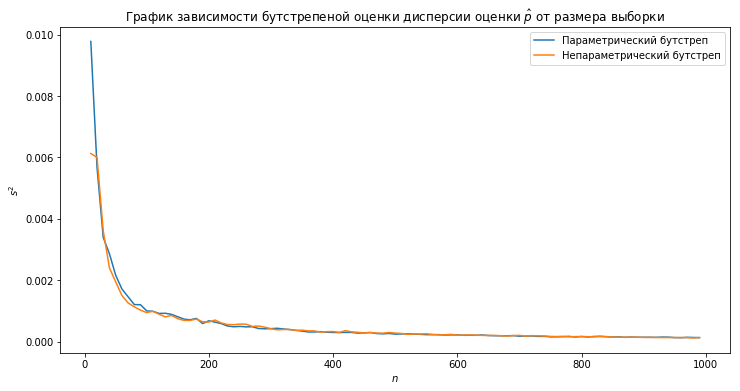

In [140]:
param_s = GetVarianceParamOfPGeom(geom_sample, p_estimators, start=10)
nonparam_s = GetVarianceNonparam(geom_sample, CountGeomEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

$p = 0.2$

In [141]:
p = 0.2

In [142]:
geom_rv = sts.geom(p)
geom_sample = geom_rv.rvs(N)
p_estimators = CountEstimators(geom_sample, CountGeomEstimator)

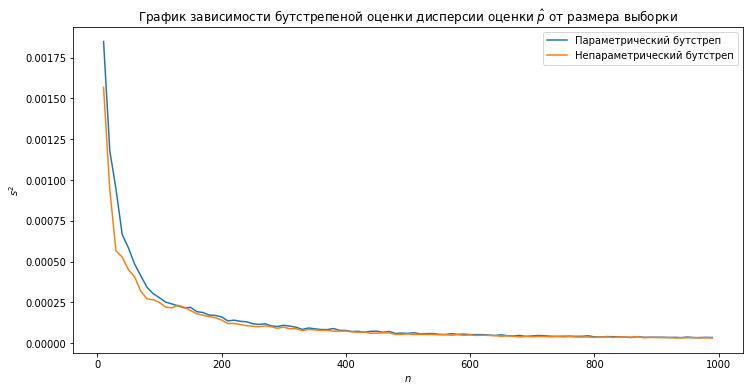

In [143]:
param_s = GetVarianceParamOfPGeom(geom_sample, p_estimators, start=10)
nonparam_s = GetVarianceNonparam(geom_sample, CountGeomEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{p}$", start=10)

$\textbf{Вывод:}$ Свойства представленные выше, к примеру для нормального распределения, также сохраняются.

# Бета распределение

Бета распределение с параметрами $\lambda_1$ и $\lambda_2$. Для $\lambda_1$ оценка $\hat{\lambda_1} = \frac{\overline{X^2}\cdot  \overline{X} - \left(\overline{X}\right)^2}{\left(\overline{X}\right)^2 - \overline{X^2}}$, для $\lambda_2$ оценка $\hat{\lambda_2} = \frac{\left(\overline{X^2} - \overline{X}\right)\left(1 - \overline{X}\right)}{\left(\overline{X}\right)^2 - \overline{X^2}}$

In [144]:
lambda_one = 0.5
lambda_two = 0.5

In [145]:
beta_rv = sts.beta(lambda_one, lambda_two)
beta_sample = beta_rv.rvs(N)

In [146]:
def CountLambdaOneEstimator(sample):
    return (np.mean(sample ** 2) * np.mean(sample) - \
            np.mean(sample) ** 2) / (np.mean(sample) ** 2  \
                                     - np.mean(sample ** 2))

In [147]:
def CountLambdaTwoEstimator(sample):
    return (np.mean(sample ** 2) - np.mean(sample)) * \
            (1 - np.mean(sample)) / (np.mean(sample) ** 2 - \
                                     np.mean(sample ** 2))

In [148]:
lambda_one_estimators = CountEstimators(beta_sample, CountLambdaOneEstimator)
lambda_two_estimators = CountEstimators(beta_sample, CountLambdaTwoEstimator)

In [149]:
def GetVarianceParamOfLambdaOne(sample, param_estimators, lambda_two, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        beta_rv = sts.beta(param_estimators[n], lambda_two)
        bootstrap_param_samples = beta_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountLambdaOneEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \ 
        np.mean(bootstrap_estimators) ** 2
    return s

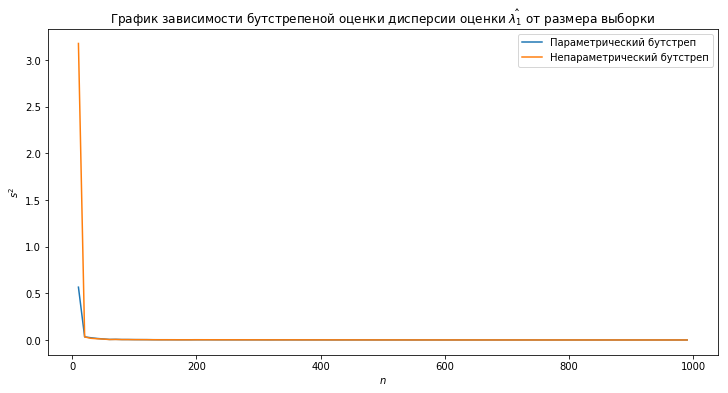

In [150]:
param_s = GetVarianceParamOfLambdaOne(beta_sample, lambda_one_estimators, 
                                      lambda_two, start=10)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaOneEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_1}$", start=10)

В данном случае имеем, что при очень малых размерах выборки непараметрическая оценка дисперсии ведет себя очень плохо. Рассмотрим более подробно график при размерах выборки больше 100.

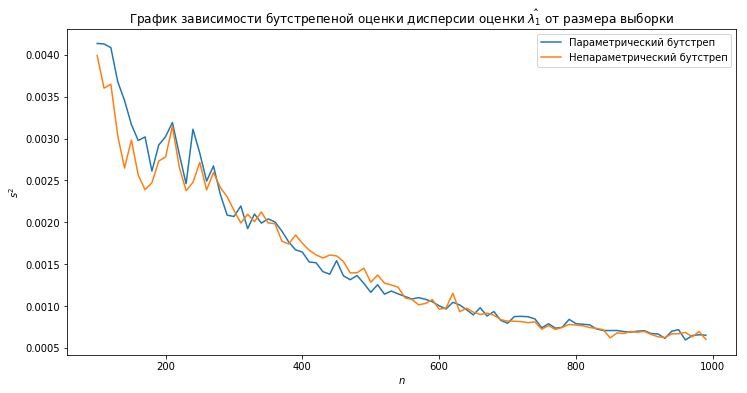

In [152]:
param_s = GetVarianceParamOfLambdaOne(beta_sample, lambda_one_estimators, 
                                      lambda_two, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaOneEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_1}$", start=100)

In [153]:
def GetVarianceParamOfLambdaTwo(sample, param_estimators, lambda_one, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        beta_rv = sts.beta(lambda_one, param_estimators[n])
        bootstrap_param_samples = beta_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountLambdaTwoEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

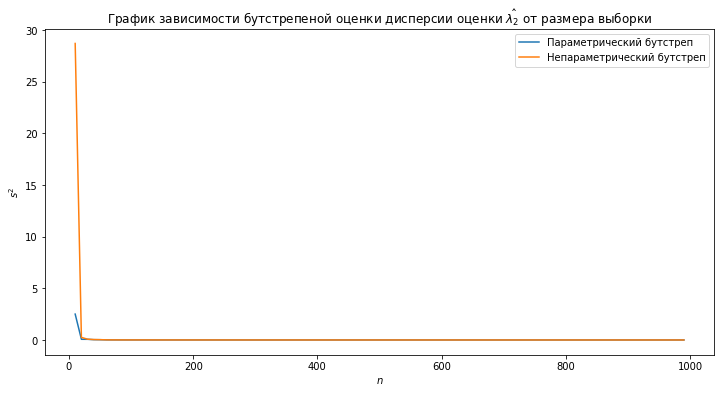

In [154]:
param_s = GetVarianceParamOfLambdaTwo(beta_sample, lambda_two_estimators, 
                                      lambda_one, start=10)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaTwoEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_2}$", start=10)

Аналогично параметру $\lambda_1$ рассмотрим график при больших значениях $n$

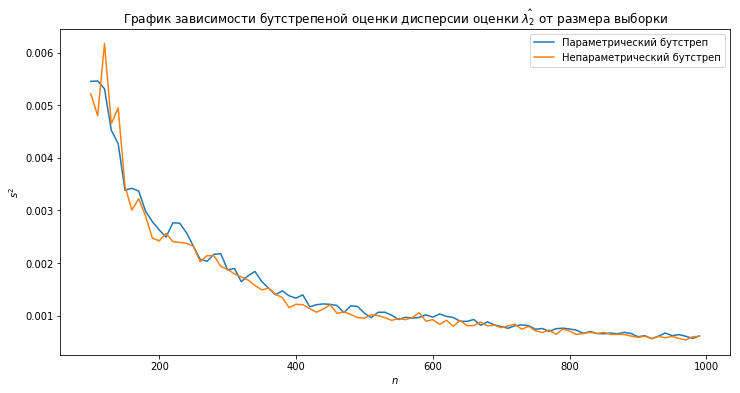

In [155]:
param_s = GetVarianceParamOfLambdaTwo(beta_sample, lambda_two_estimators, 
                                      lambda_one, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaTwoEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_2}$", start=100)

Рассмотрим оценки при других параметрах. Будем строить графики при размерах выборки больших 100, для лучшей наглядности.

$\lambda_1 = 5$, $\lambda_2 = 1$

In [156]:
lambda_one = 5
lambda_two = 1

In [157]:
beta_rv = sts.beta(lambda_one, lambda_two)
beta_sample = beta_rv.rvs(N)
lambda_one_estimators = CountEstimators(beta_sample, CountLambdaOneEstimator)
lambda_two_estimators = CountEstimators(beta_sample, CountLambdaTwoEstimator)

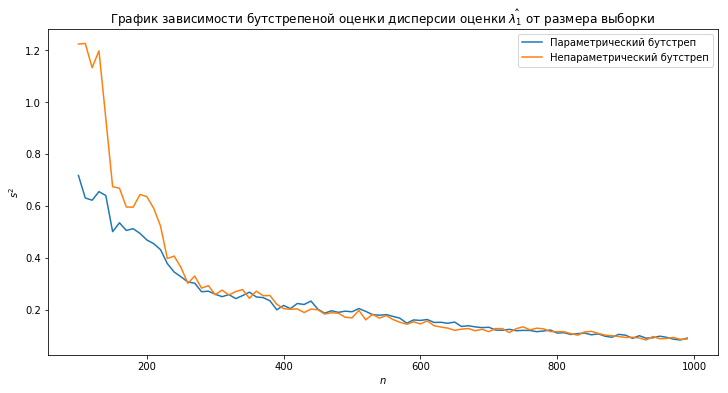

In [158]:
param_s = GetVarianceParamOfLambdaOne(beta_sample, lambda_one_estimators, 
                                      lambda_two, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaOneEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_1}$", start=100)

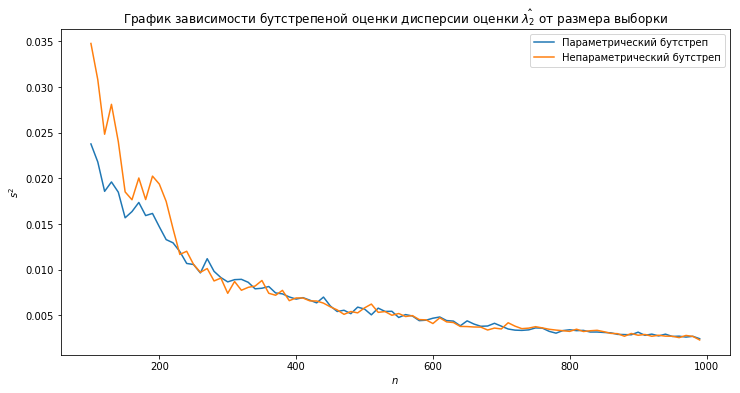

In [159]:
param_s = GetVarianceParamOfLambdaTwo(beta_sample, lambda_two_estimators, 
                                      lambda_one, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaTwoEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_2}$", start=100)

$\lambda_1 = 2$, $\lambda_2 = 5$

In [160]:
lambda_one = 2
lambda_two = 5

In [161]:
beta_rv = sts.beta(lambda_one, lambda_two)
beta_sample = beta_rv.rvs(N)
lambda_one_estimators = CountEstimators(beta_sample, CountLambdaOneEstimator)
lambda_two_estimators = CountEstimators(beta_sample, CountLambdaTwoEstimator)

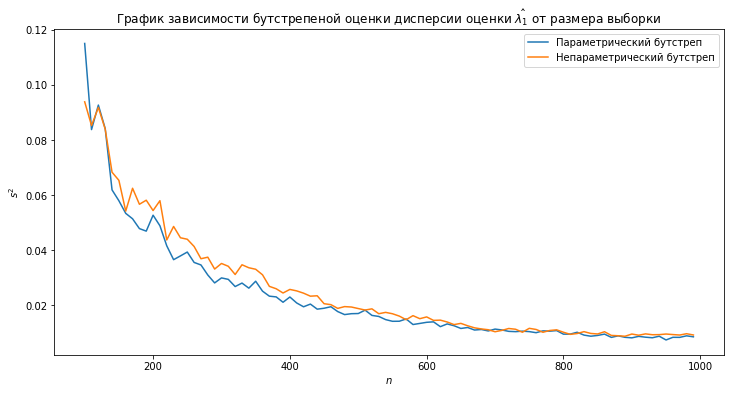

In [162]:
param_s = GetVarianceParamOfLambdaOne(beta_sample, lambda_one_estimators, 
                                      lambda_two, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaOneEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_1}$", start=100)

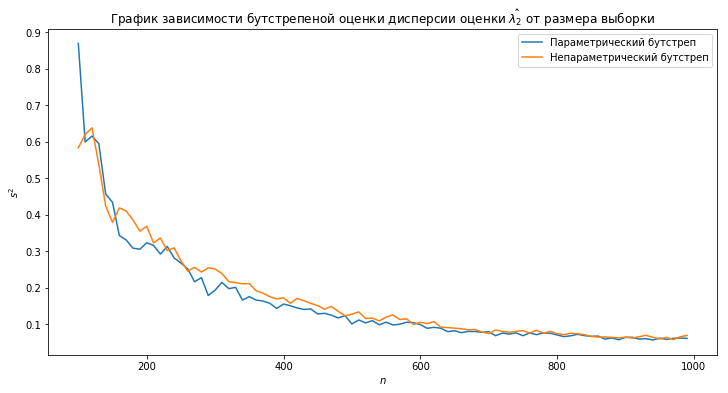

In [163]:
param_s = GetVarianceParamOfLambdaTwo(beta_sample, lambda_two_estimators, 
                                      lambda_one, start=100)
nonparam_s = GetVarianceNonparam(beta_sample, CountLambdaTwoEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\lambda_2}$", start=100)

$\textbf{Вывод:}$ В данном распределении бутстрепный метод ведет себя очень плохо при маленьких размерах выборки. Тем не менее, при больших $n$ оценка дисперсии стремится к нулю, причем значения при параметрическом и непараметрическом бутстрепе почти совпадают.

# Распределение Парето

Распределение Парето с параметром $\gamma$.  Для $\gamma$ оценка $\hat{\gamma} = \frac{1}{\overline{\ln{X}}}$.

In [164]:
gamma = 2

In [165]:
pareto_rv = sts.pareto(gamma)
pareto_sample = pareto_rv.rvs(N)

In [166]:
def CountParetoEstimator(sample):
    return 1 / np.mean(np.log(sample))

In [167]:
gamma_estimators = CountEstimators(pareto_sample, CountParetoEstimator)

In [168]:
def GetVarianceParamOfGamma(sample, param_estimators, start):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        pareto_rv = sts.pareto(param_estimators[n])
        bootstrap_param_samples = pareto_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountParetoEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

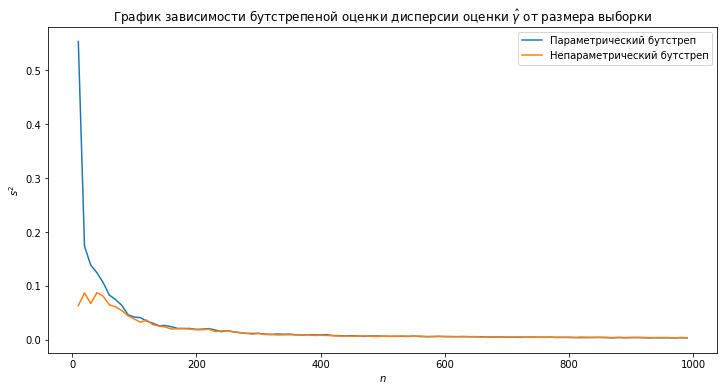

In [169]:
param_s = GetVarianceParamOfGamma(pareto_sample, gamma_estimators, start=10)
nonparam_s = GetVarianceNonparam(pareto_sample, CountParetoEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\gamma}$", start=10)

Рассмотрим оценки при других параметрах.

$\gamma = 5$

In [170]:
gamma = 5

In [171]:
pareto_rv = sts.pareto(gamma)
pareto_sample = pareto_rv.rvs(N)
gamma_estimators = CountEstimators(pareto_sample, CountParetoEstimator)

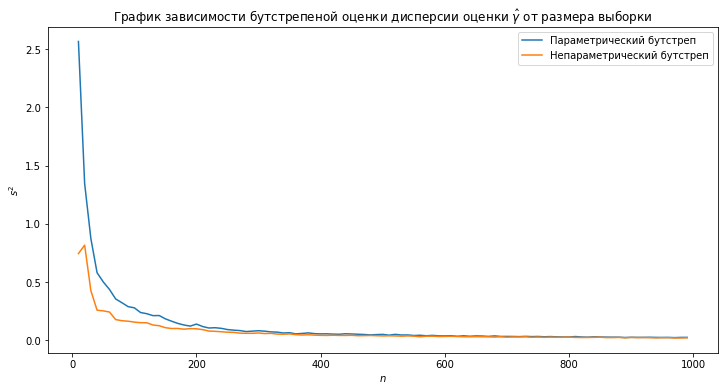

In [172]:
param_s = GetVarianceParamOfGamma(pareto_sample, gamma_estimators, start=10)
nonparam_s = GetVarianceNonparam(pareto_sample, CountParetoEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\gamma}$", start=10)

$\gamma = 8$

In [173]:
gamma = 8

In [174]:
pareto_rv = sts.pareto(gamma)
pareto_sample = pareto_rv.rvs(N)
gamma_estimators = CountEstimators(pareto_sample, CountParetoEstimator)

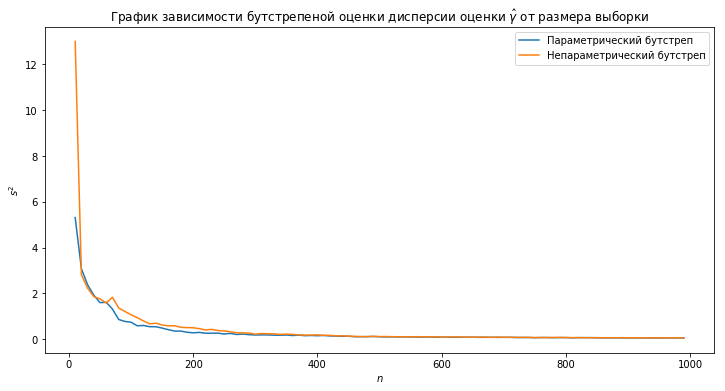

In [175]:
param_s = GetVarianceParamOfGamma(pareto_sample, gamma_estimators, start=10)
nonparam_s = GetVarianceNonparam(pareto_sample, CountParetoEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\gamma}$", start=10)

$\textbf{Вывод:}$ Также как и для Бета распределения, при малых $n$ бутстрепная оценка может быть заметно больше, чем при больших размерах выборки, причем как и в параметрическом, так и в непараметрическом бутстрепе.

# Распределение Коши

Распределение Коши с параметром $\theta$.  Для $\theta$ оценка $\hat{\theta} = \frac{1}{tg \left(\pi \overline{I(x \in [0, 1])}\right)}$.

In [227]:
theta = 0.5

In [228]:
cauchy_rv = sts.cauchy(scale=theta)
cauchy_sample = cauchy_rv.rvs(N)

In [229]:
def CountCauchyEstimator(sample):
    return 1 / np.tan(np.pi * \
                      np.mean([1 if x >= 0 and x <= 1 else 0 for x in sample]))

In [230]:
cauchy_estimators = CountEstimators(cauchy_sample, CountCauchyEstimator)

In [231]:
def GetVarianceParamOfCauchy(sample, cauchy_estimators, start=10):
    s = np.zeros((N - start) // step)
    for n in range(start, N, step):
        bootstrap_estimators = np.zeros(K)
        cauchy_rv = sts.cauchy(cauchy_estimators[n])
        bootstrap_param_samples = cauchy_rv.rvs((K, n))
        for k in range(K):
            bootstrap_estimators[k] = CountCauchyEstimator(bootstrap_param_samples[k])
        s[(n - start) // step] = np.mean(bootstrap_estimators ** 2) - \
        np.mean(bootstrap_estimators) ** 2
    return s

/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/home/sava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


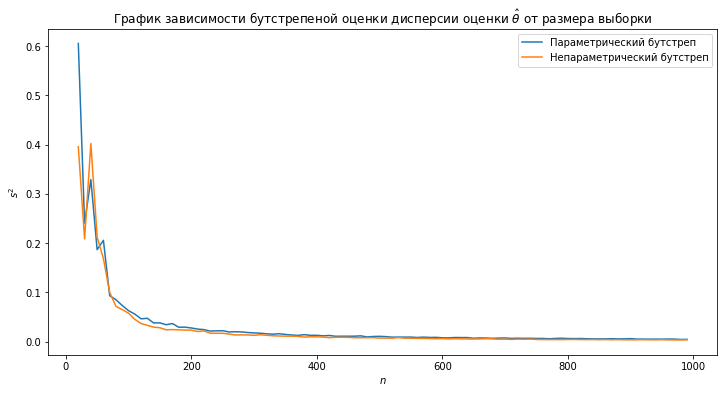

In [232]:
param_s = GetVarianceParamOfCauchy(cauchy_sample, cauchy_estimators, start=10)
nonparam_s = GetVarianceNonparam(cauchy_sample, CountCauchyEstimator, start=10)
CreatePlot(param_s, nonparam_s, r"$\hat{\theta}$", start=10)

Как можно заметить из графика, при маленьких размерах выборки значений оценки дисперсии значительно больше, также иногда может возникнуть деление на ноль. Поэтому рассмотрим более подробно график при $n > 100$.

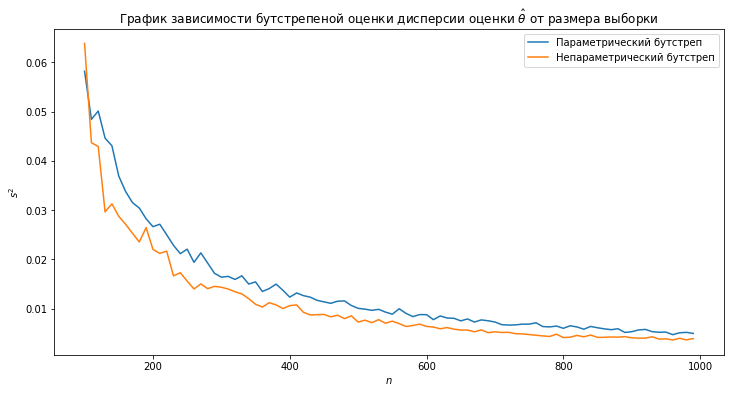

In [234]:
param_s = GetVarianceParamOfCauchy(cauchy_sample, cauchy_estimators, start=100)
nonparam_s = GetVarianceNonparam(cauchy_sample, CountCauchyEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\theta}$", start=100)

Рассмотрим оценки при других параметрах. Графики будем рисовать начиная с размера выборки равного 100.

$\theta = 1$

In [247]:
theta = 1

In [248]:
cauchy_rv = sts.cauchy(scale=theta)
cauchy_sample = cauchy_rv.rvs(N)

In [249]:
cauchy_estimators = CountEstimators(cauchy_sample, CountCauchyEstimator)

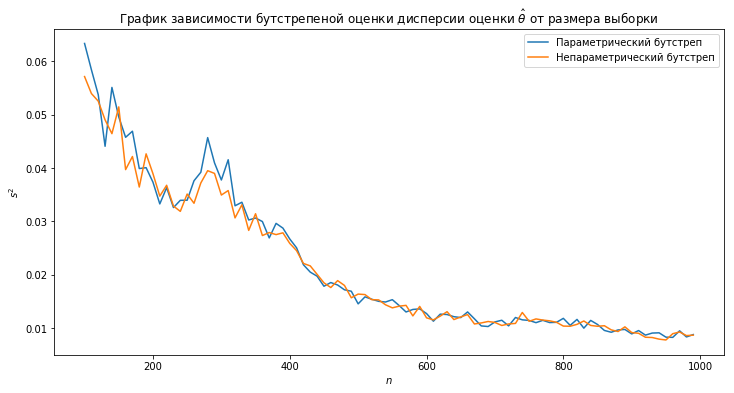

In [250]:
param_s = GetVarianceParamOfCauchy(cauchy_sample, cauchy_estimators, start=100)
nonparam_s = GetVarianceNonparam(cauchy_sample, CountCauchyEstimator, start=100)
CreatePlot(param_s, nonparam_s, r"$\hat{\theta}$", start=100)

$\theta = 2$

In [251]:
theta = 2

In [252]:
cauchy_rv = sts.cauchy(scale=theta)
cauchy_sample = cauchy_rv.rvs(N)

In [253]:
cauchy_estimators = CountEstimators(cauchy_sample, CountCauchyEstimator)

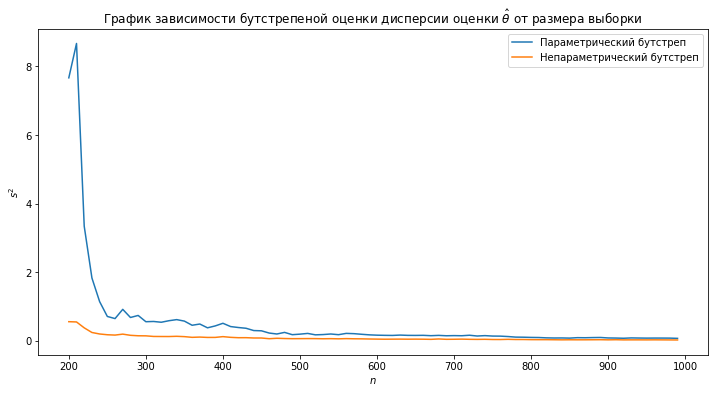

In [254]:
param_s = GetVarianceParamOfCauchy(cauchy_sample, cauchy_estimators, start=200)
nonparam_s = GetVarianceNonparam(cauchy_sample, CountCauchyEstimator, start=200)
CreatePlot(param_s, nonparam_s, r"$\hat{\theta}$", start=200)

$\textbf{Вывод:}$ Оценка дисперсии оценки параметра в распределении Коши ведет себя очень плохо при маленьких $n$, при чем там часто возникает деление на ноль, пр посчете бутстрепной оценки. А также даже при больших значениях $n$, если $\theta$ тоже довольно большое, то параметрический бутстреп ведет себя гораздо хуже непараметрического и очень медленно стремится к нулю.

$\textbf{Общий вывод:}$ Как мы увидели из графиков, для каждого распределения бутстрепная оценка дисперсии оценки параметра стремится к нулю при увеличении рамзера выборки, как для параметрического, так и для непараметрического бутстрепа. Это связано с тем, что количество бутстрепных выборок равно $n$, то есть увеличивается при увеличении размера выборки. Кроме того, мы увидели, что при некоторых распределениях (Коши, Бета и биномиальное) даже при размерах выборки около ста значение бутстрепной оценки дисперсии может быть очень большим по сравнению с значениями при $n > 200$. Более того, при размерах выборки меньших десяти, данные бустрепные оценки дисперсии дают огромнейшие значения, так как размер каждого бутстрепа также меньше 10 и соответсвенно дисперсия оказывается довольно большой. Тем не менее оба бутстрепа очень хорошо себя ведут при больших размерах выборки при любом распределении, что связан с большими размерами и бутстрепных выборок.